# User Bias in Data Cleaning
For your homework assignment this week, we will explore how our treatment of our data can impact the quality of our results.

**Dataset:**
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs.

A list of the corresponding survey questions can be found [here](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html).

 

# Imports

In [1188]:
from collections import Counter

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import pandas as pd

In [1189]:
df = pd.read_csv('survey_data.csv', parse_dates=[0], header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28109 entries, 0 to 28108
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       28109 non-null  datetime64[ns]
 1   1       28109 non-null  object        
 2   2       28034 non-null  object        
 3   3       28108 non-null  object        
 4   4       7273 non-null   object        
 5   5       28109 non-null  object        
 6   6       20793 non-null  float64       
 7   7       28109 non-null  object        
 8   8       211 non-null    object        
 9   9       3047 non-null   object        
 10  10      28109 non-null  object        
 11  11      23074 non-null  object        
 12  12      28027 non-null  object        
 13  13      28109 non-null  object        
 14  14      28109 non-null  object        
 15  15      27886 non-null  object        
 16  16      27938 non-null  object        
 17  17      27932 non-null  object        
dtypes: dat

In [1190]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# Assignment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

[Add as many code cell below here as needs]


**Question:** How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).

The state of the dataset is filthy. All columns but one are held as strings, but many can be categories and one should be numerical. Many of the missing values are from not requiring answers to questions. Some of this extra information offered in the not-requiring-answers questions may not be as useful as the main questions. Having some information about the question in the column names would be nice. Some columns have missing values that could be filled easily based on other columns. Columns with free-form entries will be hard to work with but still contain useful information. Luckily, all the questions that are required to submit the survey appear to have no missing values and many can be binned into categories. 

## The Plan

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

**Question:** Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

I'll add column names respectively: ['timestamp', 'age', 'industry', 'title', 'title_context', 'salary', 'additional_comp', 'currency', 'currency_other', 'income_context', 'country', 'state', 'city', 'experience', 'field_experience', 'education', 'gender', 'race']

The 'context' columns will be difficult to clean up. They are mostly null and the free-form entries will be too difficult to parse to be worth it. Year and month should be extracted from the 'Timestamp' column. 

age, industry, currency, state, experience, field_experience, education, gender, race -> categorical

This will probably involve some manual cleaning and use of other columns to fill in gaps. 

Salary, additional_comp -> numerical

Additional_comp is tricky as it could be added to the salary column. I'll decide that the model's intention is to predict salary pluss additional_comp, so I'll add them together.

Title can be parsed for common words like 'manager' or 'engineer' to create a new column.

In order for this to go into a model, all columns will need to be numerical. That will involve some kind of encoding for the categorical columns. One-hot encoding will hugely increase the number of columns, but it will be necessary to not introduce bias from ordinal encoding besides where that is appropriate.

As I go along in the notebook, I will add more detail to this plan.

---

This is coming as I'm finishing up the notebook, I decided that the model this data should be trained on should be specific to the US. Most of the data is from the US and trying to make a model to predict salaries in other countries would likely not perform well. I am going to drop all rows that are not from the US.

## Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

[Add as many code cell below here as needs]

In [1191]:
df.columns = ['timestamp', 'age', 'industry', 'title', 'title_context', 'salary', 'additional_comp', 'currency', 'currency_other', 'income_context', 'country', 'state', 'city', 'experience', 'field_experience', 'education', 'gender', 'race']
df

,timestamp,age,industry,title,title_context,salary,additional_comp,currency,currency_other,income_context,country,state,city,experience,field_experience,education,gender,race
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28104,2025-01-03 16:03:10,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,USD,NaN,NaN,USA,Texas,Dallas,1 year or less,1 year or less,Master's degree,Woman,White
28105,2025-01-16 10:00:47,35-44,Entertainment,Product communication and education specialist,NaN,1000000,NaN,Other,Czk,NaN,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White
28106,2025-01-23 19:38:04,35-44,Nonprofits,Director of content design,NaN,132000,NaN,USD,NaN,NaN,USA,Missouri,Kansas City,11 - 20 years,11 - 20 years,Master's degree,Woman,White
28107,2025-01-27 21:02:19,45-54,Computing or Tech,CMO,NaN,279000,0.0,USD,NaN,NaN,USA,Washington,seattle,21 - 30 years,11 - 20 years,Master's degree,Woman,Middle Eastern or Northern African


In [1192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28109 entries, 0 to 28108
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         28109 non-null  datetime64[ns]
 1   age               28109 non-null  object        
 2   industry          28034 non-null  object        
 3   title             28108 non-null  object        
 4   title_context     7273 non-null   object        
 5   salary            28109 non-null  object        
 6   additional_comp   20793 non-null  float64       
 7   currency          28109 non-null  object        
 8   currency_other    211 non-null    object        
 9   income_context    3047 non-null   object        
 10  country           28109 non-null  object        
 11  state             23074 non-null  object        
 12  city              28027 non-null  object        
 13  experience        28109 non-null  object        
 14  field_experience  2810

#### Time

More granular time data than year and month is probably not useful. So I will drop the timestamp column after extracting year and month.

In [1193]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df.drop('timestamp', axis=1, inplace=True)
df

,age,industry,title,title_context,salary,additional_comp,currency,currency_other,income_context,country,state,city,experience,field_experience,education,gender,race,year,month
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,2021,4
1,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,2021,4
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,2021,4
3,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,2021,4
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28104,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,USD,NaN,NaN,USA,Texas,Dallas,1 year or less,1 year or less,Master's degree,Woman,White,2025,1
28105,35-44,Entertainment,Product communication and education specialist,NaN,1000000,NaN,Other,Czk,NaN,Česká republika,NaN,Prague,21 - 30 years,2 - 4 years,High School,Woman,White,2025,1
28106,35-44,Nonprofits,Director of content design,NaN,132000,NaN,USD,NaN,NaN,USA,Missouri,Kansas City,11 - 20 years,11 - 20 years,Master's degree,Woman,White,2025,1
28107,45-54,Computing or Tech,CMO,NaN,279000,0.0,USD,NaN,NaN,USA,Washington,seattle,21 - 30 years,11 - 20 years,Master's degree,Woman,Middle Eastern or Northern African,2025,1


### Categorical Columns
These appear to be the easy ones to categorize. I will start with these.

In [1194]:
df['age'] = df['age'].astype('category')
df['industry'] = df['industry'].astype('category')
df['country'] = df['country'].astype('category')
df['state'] = df['state'].astype('category')
df['city'] = df['city'].astype('category')
df['experience'] = df['experience'].astype('category')
df['field_experience'] = df['field_experience'].astype('category')
df['education'] = df['education'].astype('category')
df['gender'] = df['gender'].astype('category')
df.dtypes

age                 category
industry            category
title                 object
title_context         object
salary                object
additional_comp      float64
currency              object
currency_other        object
income_context        object
country             category
state               category
city                category
experience          category
field_experience    category
education           category
gender              category
race                  object
year                   int32
month                  int32
dtype: object

Check to see how many categories in each column.

In [1195]:
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].nunique()

age                    7
industry            1220
country              383
state                137
city                4842
experience             8
field_experience       8
education              6
gender                 5
dtype: int64

#### City

City has way too many categories to be useful. I'll keep the top 10 cities and put the rest in an 'other' category.

In [1196]:
df.city.value_counts().head(10)

city
Boston           772
Chicago          752
New York         711
Seattle          691
London           576
New York City    502
San Francisco    495
Los Angeles      462
Portland         423
Toronto          416
Name: count, dtype: int64

In [1197]:
df.loc[~df.city.isin(df.city.value_counts().head(10).index), 'city'] = 'Other'
df['city'] = df.city.cat.remove_unused_categories()
df.city.value_counts()

city
Other            22309
Boston             772
Chicago            752
New York           711
Seattle            691
London             576
New York City      502
San Francisco      495
Los Angeles        462
Portland           423
Toronto            416
Name: count, dtype: int64

That's less than ideal, but city can be a big factor in salary, so I don't want to lose that information. All the nulls were also set to other taking care of the missing values.

Next up, industry. There is a set number of options in the survey, so I will use that to categorize the industry column and set the rest to other.

#### Industry

In [1198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28109 entries, 0 to 28108
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               28109 non-null  category
 1   industry          28034 non-null  category
 2   title             28108 non-null  object  
 3   title_context     7273 non-null   object  
 4   salary            28109 non-null  object  
 5   additional_comp   20793 non-null  float64 
 6   currency          28109 non-null  object  
 7   currency_other    211 non-null    object  
 8   income_context    3047 non-null   object  
 9   country           28109 non-null  category
 10  state             23074 non-null  category
 11  city              28109 non-null  category
 12  experience        28109 non-null  category
 13  field_experience  28109 non-null  category
 14  education         27886 non-null  category
 15  gender            27938 non-null  category
 16  race              2793

In [1199]:
df.industry.value_counts().head(50)

industry
Computing or Tech                       4712
Education (Higher Education)            2466
Nonprofits                              2420
Health care                             1899
Government and Public Administration    1893
Accounting, Banking & Finance           1812
Engineering or Manufacturing            1700
Marketing, Advertising & PR             1136
Law                                     1097
Business or Consulting                   853
Education (Primary/Secondary)            838
Media & Digital                          774
Insurance                                532
Retail                                   505
Recruitment or HR                        460
Property or Construction                 387
Art & Design                             359
Utilities & Telecommunications           357
Transport or Logistics                   304
Sales                                    286
Social Work                              274
Hospitality & Events                     262
E

Law Enforcement & Security is the lowest of the offered options as far as I can see. On second thought, I will use all the options with more than 100 samples and put the rest in 'other'.

In [1200]:
df['industry'] = df.industry.cat.add_categories('Other')
df.loc[~df.industry.isin(df.industry.value_counts().head(24).index), 'industry'] = 'Other'
df['industry'] = df.industry.cat.remove_unused_categories()
df.industry.value_counts()

industry
Computing or Tech                       4712
Education (Higher Education)            2466
Nonprofits                              2420
Other                                   2391
Health care                             1899
Government and Public Administration    1893
Accounting, Banking & Finance           1812
Engineering or Manufacturing            1700
Marketing, Advertising & PR             1136
Law                                     1097
Business or Consulting                   853
Education (Primary/Secondary)            838
Media & Digital                          774
Insurance                                532
Retail                                   505
Recruitment or HR                        460
Property or Construction                 387
Art & Design                             359
Utilities & Telecommunications           357
Transport or Logistics                   304
Sales                                    286
Social Work                              274
H

Not bad. At least 'other' isn't the top category. Missing values also set to other. I could go through and try to set some with more nuance based on the other columns, but I think this is good enough for now.

Onto country and state.

#### Country

In [1201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28109 entries, 0 to 28108
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               28109 non-null  category
 1   industry          28109 non-null  category
 2   title             28108 non-null  object  
 3   title_context     7273 non-null   object  
 4   salary            28109 non-null  object  
 5   additional_comp   20793 non-null  float64 
 6   currency          28109 non-null  object  
 7   currency_other    211 non-null    object  
 8   income_context    3047 non-null   object  
 9   country           28109 non-null  category
 10  state             23074 non-null  category
 11  city              28109 non-null  category
 12  experience        28109 non-null  category
 13  field_experience  28109 non-null  category
 14  education         27886 non-null  category
 15  gender            27938 non-null  category
 16  race              2793

In [1202]:
df.country.value_counts().head(50)

country
United States                9004
USA                          7946
US                           2612
Canada                       1572
United States                 668
U.S.                          581
UK                            574
United Kingdom                548
USA                           468
Usa                           448
United States of America      430
Australia                     318
United states                 208
usa                           184
Germany                       174
England                       134
united states                 116
Us                            105
Ireland                       103
New Zealand                    95
Uk                             85
Canada                         76
Australia                      68
United Kingdom                 65
France                         65
U.S.A.                         46
Spain                          44
United States of America       44
Netherlands                    43
Scotla

Ah man, I really wish they would have used a dropdown for country. I'll have to do some cleaning here.

In [1203]:
df = df.copy()

df['country'] = df.country.str.lower()
df['country'] = df.country.str.replace(r'\W', '', regex=True)
us_strings = ['us', 'unitedstates', 'unitedstatesofamerica', 'usa', 'unitesstates', 'america', 'unitedsates', 'theunitedstates', 'unitedstated', 'unitedstate', 'unitedstateofamerica', 'unitedstares', 'unitedstatea']
df.loc[df.country.isin(us_strings), 'country'] = 'us'
df.loc[~df.state.isnull(), 'country'] = 'us'
df = df.loc[df.country == 'us']
df.drop('country', axis=1, inplace=True)
df

,age,industry,title,title_context,salary,additional_comp,currency,currency_other,income_context,state,city,experience,field_experience,education,gender,race,year,month
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,2021,4
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,Tennessee,Other,2 - 4 years,2 - 4 years,College degree,Woman,White,2021,4
3,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,Wisconsin,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,South Carolina,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,USD,NaN,NaN,New Hampshire,Other,8 - 10 years,2 - 4 years,Master's degree,Man,White,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,NaN,75000,NaN,USD,NaN,NaN,New York,Other,2 - 4 years,1 year or less,Master's degree,Woman,White,2024,12
28103,25-34,Entertainment,Junior Editor,NaN,72800,NaN,USD,NaN,NaN,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",2024,12
28104,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,USD,NaN,NaN,Texas,Other,1 year or less,1 year or less,Master's degree,Woman,White,2025,1
28106,35-44,Nonprofits,Director of content design,NaN,132000,NaN,USD,NaN,NaN,Missouri,Other,11 - 20 years,11 - 20 years,Master's degree,Woman,White,2025,1


In [1204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23244 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23244 non-null  category
 1   industry          23244 non-null  category
 2   title             23243 non-null  object  
 3   title_context     6100 non-null   object  
 4   salary            23244 non-null  object  
 5   additional_comp   17428 non-null  float64 
 6   currency          23244 non-null  object  
 7   currency_other    39 non-null     object  
 8   income_context    2519 non-null   object  
 9   state             23074 non-null  category
 10  city              23244 non-null  category
 11  experience        23244 non-null  category
 12  field_experience  23244 non-null  category
 13  education         23091 non-null  category
 14  gender            23103 non-null  category
 15  race              23097 non-null  object  
 16  year              23244 non

#### State

In [1205]:
df.state.value_counts().head(55)

state
California                        2611
New York                          2174
Massachusetts                     1522
Texas                             1269
Illinois                          1213
Washington                        1185
District of Columbia               983
Pennsylvania                       943
Virginia                           786
Minnesota                          723
Ohio                               655
Colorado                           632
Oregon                             626
North Carolina                     601
Maryland                           564
Georgia                            552
Michigan                           545
Florida                            522
Wisconsin                          469
New Jersey                         399
Missouri                           345
Indiana                            329
Arizona                            302
Tennessee                          286
Connecticut                        239
Utah               

Like with city, I'll keep the top 10 states and put the rest in 'other'.

In [1206]:
df['state'] = df.state.cat.add_categories('Other')
df.loc[~df.state.isin(df.state.value_counts().head(10).index), 'state'] = 'Other'
df['state'] = df.state.cat.remove_unused_categories()
df.state.value_counts().head(53)

state
Other                   9835
California              2611
New York                2174
Massachusetts           1522
Texas                   1269
Illinois                1213
Washington              1185
District of Columbia     983
Pennsylvania             943
Virginia                 786
Minnesota                723
Name: count, dtype: int64

In [1207]:
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].nunique()

age                  7
industry            25
state               11
city                11
experience           8
field_experience     8
education            6
gender               5
dtype: int64

In [1208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23244 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23244 non-null  category
 1   industry          23244 non-null  category
 2   title             23243 non-null  object  
 3   title_context     6100 non-null   object  
 4   salary            23244 non-null  object  
 5   additional_comp   17428 non-null  float64 
 6   currency          23244 non-null  object  
 7   currency_other    39 non-null     object  
 8   income_context    2519 non-null   object  
 9   state             23244 non-null  category
 10  city              23244 non-null  category
 11  experience        23244 non-null  category
 12  field_experience  23244 non-null  category
 13  education         23091 non-null  category
 14  gender            23103 non-null  category
 15  race              23097 non-null  object  
 16  year              23244 non

### Salary

In [1209]:
df['salary'].str.replace(r'\W', '', regex=True).astype(float).describe()

count    2.324400e+04
mean     9.288490e+04
std      1.066879e+05
min      0.000000e+00
25%      5.615750e+04
50%      7.800000e+04
75%      1.120000e+05
max      1.000000e+07
Name: salary, dtype: float64

In [1210]:
df['num_sal'] = df['salary'].str.replace(r'\W', '', regex=True).astype(float)
df.loc[df.num_sal < 100].sample(10)

,age,industry,title,title_context,salary,additional_comp,currency,currency_other,income_context,state,city,experience,field_experience,education,gender,race,year,month,num_sal
26208,18-24,Media & Digital,Marketing Coordinator,NaN,36,NaN,USD,NaN,NaN,Other,Other,2 - 4 years,1 year or less,College degree,Woman,White,2021,5,36.0
97,55-64,Other,Quality Assurance Lead,NaN,58,NaN,USD,NaN,NaN,Other,Other,21 - 30 years,8 - 10 years,Master's degree,Woman,White,2021,4,58.0
8739,35-44,Other,"""mum"" ;)",NaN,0,0.0,USD,NaN,NaN,Other,Other,21 - 30 years,8 - 10 years,Master's degree,Woman,White,2021,4,0.0
27137,55-64,Health care,Scribe,I edit medical documents,44,5.0,USD,NaN,NaN,California,Los Angeles,21 - 30 years,11 - 20 years,High School,Woman,White,2021,10,44.0
26072,55-64,Sales,Territory Manager,NaN,40,40000.0,USD,NaN,NaN,Minnesota,Other,31 - 40 years,31 - 40 years,Some college,Woman,White,2021,5,40.0
28020,25-34,Other,Student,NaN,0,0.0,USD,NaN,NaN,Illinois,Other,1 year or less,1 year or less,College degree,Other or prefer not to answer,White,2024,3,0.0
23621,35-44,Other,Web Customer Service Rep.,NaN,55,NaN,USD,NaN,NaN,California,Other,21 - 30 years,21 - 30 years,Some college,Woman,"Hispanic, Latino, or Spanish origin",2021,5,55.0
26562,under 18,"Accounting, Banking & Finance",na,na,00,0.0,USD,na,na,Other,Other,1 year or less,1 year or less,High School,Man,Asian or Asian American,2021,7,0.0
26234,25-34,Nonprofits,Finance Assistant,NaN,45,1200.0,USD,NaN,NaN,Other,Other,2 - 4 years,2 - 4 years,College degree,Man,White,2021,5,45.0
13537,25-34,Education (Primary/Secondary),Student teacher,Am training to be a teacher,0,0.0,USD,NaN,Student teaching is usually unpaid,Other,Other,2 - 4 years,2 - 4 years,Master's degree,Woman,"Middle Eastern or Northern African, White",2021,4,0.0


If the target is at different scales the ML model is going to have a really hard time. I could go through and apply the conversion rates to the salary column, but that sounds super tedious. I'll just drop the rows with other currencies. I'm only going to clean the data with the intention of making a model for salaries entered in the USD.

In [1211]:
df = df[df.currency == 'USD']
df = df[df.currency_other.isnull()]
df.drop(['currency', 'currency_other'], axis=1, inplace=True)
df

,age,industry,title,title_context,salary,additional_comp,income_context,state,city,experience,field_experience,education,gender,race,year,month,num_sal
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,NaN,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,2021,4,55000.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,NaN,Other,Other,2 - 4 years,2 - 4 years,College degree,Woman,White,2021,4,34000.0
3,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,NaN,Other,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4,62000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,NaN,Other,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4,60000.0
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,"62,000",NaN,NaN,Other,Other,8 - 10 years,2 - 4 years,Master's degree,Man,White,2021,4,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,NaN,75000,NaN,NaN,New York,Other,2 - 4 years,1 year or less,Master's degree,Woman,White,2024,12,75000.0
28103,25-34,Entertainment,Junior Editor,NaN,72800,NaN,NaN,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",2024,12,72800.0
28104,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,NaN,Texas,Other,1 year or less,1 year or less,Master's degree,Woman,White,2025,1,100000.0
28106,35-44,Nonprofits,Director of content design,NaN,132000,NaN,NaN,Other,Other,11 - 20 years,11 - 20 years,Master's degree,Woman,White,2025,1,132000.0


In [1212]:
df.num_sal.quantile([0.001, 0.999])

0.001        40.752
0.999    800000.000
Name: num_sal, dtype: float64

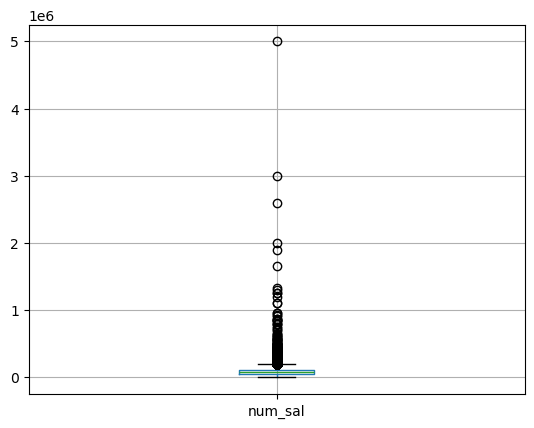

In [1213]:
df.boxplot(column='num_sal')
plt.show()

I'm about at my wits end with this dataset. I'm going to drop the rows where salary is below the bottom 0.1% and top 99.9% as these are errors or outliers. I could try to get the model to predict these, but it'd make all the other predictions worse.

In [1214]:
df = df[df.num_sal >= df.num_sal.quantile(0.001)]
df = df[df.num_sal <= df.num_sal.quantile(0.999)]
df.num_sal.describe()

count     23142.000000
mean      90818.124665
std       52654.893123
min          44.000000
25%       56283.750000
50%       78208.500000
75%      112000.000000
max      800000.000000
Name: num_sal, dtype: float64

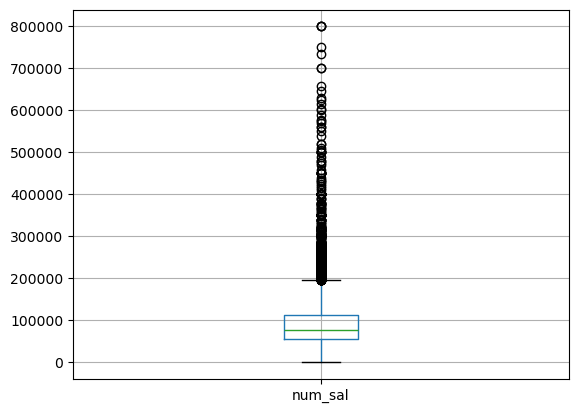

In [1215]:
df.boxplot(column='num_sal')
plt.show()

That looks way more realistic. 

In [1216]:
df['salary'] = df['num_sal'].astype(int)
df.drop('num_sal', axis=1, inplace=True)
df

,age,industry,title,title_context,salary,additional_comp,income_context,state,city,experience,field_experience,education,gender,race,year,month
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,NaN,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,2021,4
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,NaN,Other,Other,2 - 4 years,2 - 4 years,College degree,Woman,White,2021,4
3,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,NaN,Other,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,NaN,Other,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,NaN,62000,NaN,NaN,Other,Other,8 - 10 years,2 - 4 years,Master's degree,Man,White,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,18-24,Engineering or Manufacturing,Clinical Specialist - Biomedical Engineer,NaN,75000,NaN,NaN,New York,Other,2 - 4 years,1 year or less,Master's degree,Woman,White,2024,12
28103,25-34,Entertainment,Junior Editor,NaN,72800,NaN,NaN,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",2024,12
28104,18-24,Engineering or Manufacturing,Applications Engineer,NaN,100000,21000.0,NaN,Texas,Other,1 year or less,1 year or less,Master's degree,Woman,White,2025,1
28106,35-44,Nonprofits,Director of content design,NaN,132000,NaN,NaN,Other,Other,11 - 20 years,11 - 20 years,Master's degree,Woman,White,2025,1


In [1217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 0 to 28107
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23142 non-null  category
 1   industry          23142 non-null  category
 2   title             23142 non-null  object  
 3   title_context     6071 non-null   object  
 4   salary            23142 non-null  int64   
 5   additional_comp   17353 non-null  float64 
 6   income_context    2492 non-null   object  
 7   state             23142 non-null  category
 8   city              23142 non-null  category
 9   experience        23142 non-null  category
 10  field_experience  23142 non-null  category
 11  education         22991 non-null  category
 12  gender            23003 non-null  category
 13  race              22997 non-null  object  
 14  year              23142 non-null  int32   
 15  month             23142 non-null  int32   
dtypes: category(8), float64(1),

### Title

I'll find common words in titles and add columns for them.

In [1218]:
words = word_tokenize(' '.join(df.title.dropna().str.lower()))
Counter(words).most_common(10)

[('manager', 4414),
 ('senior', 2411),
 ('director', 2392),
 ('engineer', 1838),
 ('analyst', 1403),
 ('assistant', 1393),
 ('of', 1274),
 ('associate', 1170),
 ('specialist', 1033),
 ('software', 1026)]

I'll add columns for the top 3. Without categorizing the column it can't be used in a model. Unless I made a bag of words or tf-idf matrix, but that would add so much complexity to the data. I think it's better to drop it along with title context.

In [1219]:
df['manager'] = df.title.str.contains('manager', case=False)
df['senior'] = df.title.str.contains('senior', case=False)
df['director'] = df.title.str.contains('director', case=False)
df.drop(['title', 'title_context'], axis=1, inplace=True)
df

,age,industry,salary,additional_comp,income_context,state,city,experience,field_experience,education,gender,race,year,month,manager,senior,director
0,25-34,Education (Higher Education),55000,0.0,NaN,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,2021,4,False,False,False
2,25-34,"Accounting, Banking & Finance",34000,NaN,NaN,Other,Other,2 - 4 years,2 - 4 years,College degree,Woman,White,2021,4,False,False,False
3,25-34,Nonprofits,62000,3000.0,NaN,Other,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4,True,False,False
4,25-34,"Accounting, Banking & Finance",60000,7000.0,NaN,Other,Other,8 - 10 years,5-7 years,College degree,Woman,White,2021,4,True,False,False
5,25-34,Education (Higher Education),62000,NaN,NaN,Other,Other,8 - 10 years,2 - 4 years,Master's degree,Man,White,2021,4,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28101,18-24,Engineering or Manufacturing,75000,NaN,NaN,New York,Other,2 - 4 years,1 year or less,Master's degree,Woman,White,2024,12,False,False,False
28103,25-34,Entertainment,72800,NaN,NaN,California,Los Angeles,5-7 years,5-7 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin, White",2024,12,False,False,False
28104,18-24,Engineering or Manufacturing,100000,21000.0,NaN,Texas,Other,1 year or less,1 year or less,Master's degree,Woman,White,2025,1,False,False,False
28106,35-44,Nonprofits,132000,NaN,NaN,Other,Other,11 - 20 years,11 - 20 years,Master's degree,Woman,White,2025,1,False,False,True


In [1220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 0 to 28107
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23142 non-null  category
 1   industry          23142 non-null  category
 2   salary            23142 non-null  int64   
 3   additional_comp   17353 non-null  float64 
 4   income_context    2492 non-null   object  
 5   state             23142 non-null  category
 6   city              23142 non-null  category
 7   experience        23142 non-null  category
 8   field_experience  23142 non-null  category
 9   education         22991 non-null  category
 10  gender            23003 non-null  category
 11  race              22997 non-null  object  
 12  year              23142 non-null  int32   
 13  month             23142 non-null  int32   
 14  manager           23142 non-null  bool    
 15  senior            23142 non-null  bool    
 16  director          23142 non

### Additional Compensation

This one's hard. I'm tempted to add it to the salary column, but that would introduce bias. I could also keep it and use it to predict salary, but there are so many missing values. I guess I kind of get to decide what the purpose of the model is, so I'll say it's to predict salary with additional compensation. I'll add it to salary and drop the column along with it's additional context.

In [1221]:
df.salary.describe()

count     23142.000000
mean      90818.124665
std       52654.893123
min          44.000000
25%       56283.750000
50%       78208.500000
75%      112000.000000
max      800000.000000
Name: salary, dtype: float64

In [1222]:
df['additional_comp'] = df.additional_comp.fillna(0)
df['additional_comp'] = df['additional_comp'].astype(int)
df['salary'] = df['salary'] + df['additional_comp']
df.drop(['additional_comp', 'income_context'], axis=1, inplace=True)
df.salary.describe()

count    2.314200e+04
mean     1.002938e+05
std      7.633483e+04
min      4.900000e+01
25%      5.800000e+04
50%      8.100000e+04
75%      1.200000e+05
max      1.950000e+06
Name: salary, dtype: float64

In [1223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23142 non-null  category
 1   industry          23142 non-null  category
 2   salary            23142 non-null  int64   
 3   state             23142 non-null  category
 4   city              23142 non-null  category
 5   experience        23142 non-null  category
 6   field_experience  23142 non-null  category
 7   education         22991 non-null  category
 8   gender            23003 non-null  category
 9   race              22997 non-null  object  
 10  year              23142 non-null  int32   
 11  month             23142 non-null  int32   
 12  manager           23142 non-null  bool    
 13  senior            23142 non-null  bool    
 14  director          23142 non-null  bool    
dtypes: bool(3), category(8), int32(2), int64(1), object(1)
memory usage: 974.8+

### Race

Like the states, I'll set the rows with multiple chosen races to 'multi'. Also, missing values will be set to 'Prefer not to answer'.

In [1224]:
race_options = ['Asian or Asian American', 'Black or African American', 'Hispanic, Latino, or Spanish origin', 'Middle Eastern or Northern African', 'Native American or Alaska Native', 'White', 'Another option not listed here or prefer not to answer']
df['race'] = df.race.fillna('Another option not listed here or prefer not to answer')
df.loc[~df.race.isin(race_options), 'race'] = 'multi'
df['race'] = df.race.astype('category')
df.race.value_counts()

race
White                                                     19135
Asian or Asian American                                    1104
multi                                                      1085
Black or African American                                   606
Another option not listed here or prefer not to answer      597
Hispanic, Latino, or Spanish origin                         527
Middle Eastern or Northern African                           52
Native American or Alaska Native                             36
Name: count, dtype: int64

In [1225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23142 non-null  category
 1   industry          23142 non-null  category
 2   salary            23142 non-null  int64   
 3   state             23142 non-null  category
 4   city              23142 non-null  category
 5   experience        23142 non-null  category
 6   field_experience  23142 non-null  category
 7   education         22991 non-null  category
 8   gender            23003 non-null  category
 9   race              23142 non-null  category
 10  year              23142 non-null  int32   
 11  month             23142 non-null  int32   
 12  manager           23142 non-null  bool    
 13  senior            23142 non-null  bool    
 14  director          23142 non-null  bool    
dtypes: bool(3), category(9), int32(2), int64(1)
memory usage: 816.9 KB


Woot! No more object columns. All that's left is missing values.

In [1226]:
df.isnull().sum()

age                   0
industry              0
salary                0
state                 0
city                  0
experience            0
field_experience      0
education           151
gender              139
race                  0
year                  0
month                 0
manager               0
senior                0
director              0
dtype: int64

### Gender and Education

The gender question has a 'prefer not to answer' option. That's what the nulls will be set to.

In [1227]:
df['gender'] = df.gender.fillna('Other or prefer not to answer')
df.gender.value_counts()

gender
Woman                            17931
Man                               4241
Non-binary                         596
Other or prefer not to answer      373
Prefer not to answer                 1
Name: count, dtype: int64

How?! How did that get entered?

In [1228]:
df.loc[df.gender == 'Prefer not to answer']

,age,industry,salary,state,city,experience,field_experience,education,gender,race,year,month,manager,senior,director
6477,35-44,Agriculture or Forestry,88010,Other,Other,1 year or less,5-7 years,PhD,Prefer not to answer,Another option not listed here or prefer not t...,2021,4,False,False,False


Whatever

In [1229]:
df.loc[df.gender == 'Prefer not to answer', 'gender'] = 'Other or prefer not to answer'
df['gender'] = df.gender.cat.remove_unused_categories()
df.gender.value_counts()

gender
Woman                            17931
Man                               4241
Non-binary                         596
Other or prefer not to answer      374
Name: count, dtype: int64

Wow, way more women than men.

Education is a bit trickier. There is no prefer not to answer option.

In [1230]:
df.education.value_counts()

education
College degree                        11256
Master's degree                        7448
Some college                           1637
Professional degree (MD, JD, etc.)     1127
PhD                                    1118
High School                             405
Name: count, dtype: int64

I'll group the data by industry and age then impute the most common education level for each group.

In [1231]:
ind_edu = df.groupby(['industry', 'age'], observed=False).education.value_counts().unstack()
ind_edu

education                                 College degree  High School  \
industry                      age                                       
Accounting, Banking & Finance 18-24                   59            2   
                              25-34                  400           10   
                              35-44                  267           16   
                              45-54                   77            5   
                              55-64                   36            2   
...                                                  ...          ...   
Other                         35-44                  278           20   
                              45-54                   85            4   
                              55-64                   35            0   
                              65 or over               3            1   
                              under 18                 0            1   

education                                 Master's degree  PhD  \
industry                      age                                
Accounting, Banking & Finance 18-24                     6    0   
                              25-34                   163    1   
                              35-44                   162    5   
                              45-54                    44    3   
                              55-64                    20    1   
...                                                   ...  ...   
Other                         35-44                   259   65   
                              45-54                    88   24   
                              55-64                    28    5   
                              65 or over                5    0   
                              under 18                  0    0   

education                                 Professional degree (MD, JD, etc.)  \
industry                      age                                              
Accounting, Banking & Finance 18-24                                        0   
                              25-34                                       11   
                              35-44                                       22   
                              45-54                                        5   
                              55-64                                        0   
...                                                                      ...   
Other                         35-44                                       24   
                              45-54                                        5   
                              55-64                                        3   
                              65 or over                                   0   
                              under 18                                     0   

education                                 Some college  
industry                      age                       
Accounting, Banking & Finance 18-24                  8  
                              25-34                 39  
                              35-44                 44  
                              45-54                 38  
                              55-64                 14  
...                                                ...  
Other                         35-44                 42  
                              45-54                 30  
                              55-64                 18  
                              65 or over             0  
                              under 18               0  

[175 rows x 6 columns]

In [1232]:
edu_null_idx = df[df.education.isnull()].index
df.loc[edu_null_idx]

,age,industry,salary,state,city,experience,field_experience,education,gender,race,year,month,manager,senior,director
13,25-34,Law,52000,Minnesota,Other,2 - 4 years,2 - 4 years,NaN,Woman,White,2021,4,False,False,False
24,25-34,Other,44500,Other,Other,5-7 years,2 - 4 years,NaN,Woman,White,2021,4,False,False,False
192,35-44,Education (Higher Education),65000,Texas,Other,11 - 20 years,8 - 10 years,NaN,Woman,"Hispanic, Latino, or Spanish origin",2021,4,False,False,True
659,45-54,Utilities & Telecommunications,87360,Texas,Other,21 - 30 years,11 - 20 years,NaN,Woman,Black or African American,2021,4,False,False,False
736,35-44,Health care,222000,Other,Other,8 - 10 years,8 - 10 years,NaN,Woman,White,2021,4,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27725,25-34,Engineering or Manufacturing,96000,California,Other,2 - 4 years,1 year or less,NaN,Man,Another option not listed here or prefer not t...,2022,3,False,False,False
27774,18-24,"Accounting, Banking & Finance",35000,Other,Other,1 year or less,11 - 20 years,NaN,Man,White,2022,4,False,False,False
27927,25-34,Government and Public Administration,75000,Other,Other,8 - 10 years,8 - 10 years,NaN,Woman,Asian or Asian American,2023,1,False,False,False
27942,45-54,Property or Construction,68000,Other,Other,21 - 30 years,11 - 20 years,NaN,Other or prefer not to answer,Another option not listed here or prefer not t...,2023,3,True,False,False


In [1233]:
def fill_edu(row):
    if pd.isnull(row.education):
        return ind_edu.loc[(row.industry, row.age)].idxmax()
    else:
        return row.education

In [1234]:
df['education'] = df.apply(fill_edu, axis=1)
df.loc[edu_null_idx]

,age,industry,salary,state,city,experience,field_experience,education,gender,race,year,month,manager,senior,director
13,25-34,Law,52000,Minnesota,Other,2 - 4 years,2 - 4 years,"Professional degree (MD, JD, etc.)",Woman,White,2021,4,False,False,False
24,25-34,Other,44500,Other,Other,5-7 years,2 - 4 years,College degree,Woman,White,2021,4,False,False,False
192,35-44,Education (Higher Education),65000,Texas,Other,11 - 20 years,8 - 10 years,Master's degree,Woman,"Hispanic, Latino, or Spanish origin",2021,4,False,False,True
659,45-54,Utilities & Telecommunications,87360,Texas,Other,21 - 30 years,11 - 20 years,College degree,Woman,Black or African American,2021,4,False,False,False
736,35-44,Health care,222000,Other,Other,8 - 10 years,8 - 10 years,College degree,Woman,White,2021,4,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27725,25-34,Engineering or Manufacturing,96000,California,Other,2 - 4 years,1 year or less,College degree,Man,Another option not listed here or prefer not t...,2022,3,False,False,False
27774,18-24,"Accounting, Banking & Finance",35000,Other,Other,1 year or less,11 - 20 years,College degree,Man,White,2022,4,False,False,False
27927,25-34,Government and Public Administration,75000,Other,Other,8 - 10 years,8 - 10 years,Master's degree,Woman,Asian or Asian American,2023,1,False,False,False
27942,45-54,Property or Construction,68000,Other,Other,21 - 30 years,11 - 20 years,College degree,Other or prefer not to answer,Another option not listed here or prefer not t...,2023,3,True,False,False


Looks like it worked.

In [1235]:
df['education'] = df.education.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 0 to 28107
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               23142 non-null  category
 1   industry          23142 non-null  category
 2   salary            23142 non-null  int64   
 3   state             23142 non-null  category
 4   city              23142 non-null  category
 5   experience        23142 non-null  category
 6   field_experience  23142 non-null  category
 7   education         23142 non-null  category
 8   gender            23142 non-null  category
 9   race              23142 non-null  category
 10  year              23142 non-null  int32   
 11  month             23142 non-null  int32   
 12  manager           23142 non-null  bool    
 13  senior            23142 non-null  bool    
 14  director          23142 non-null  bool    
dtypes: bool(3), category(9), int32(2), int64(1)
memory usage: 1.3 MB


### Encoding

Age, experience, field_experience, and education have inherent order so ordinal encoding for these. Month can be encoded as a cyclical feature usning sin and cos. The rest of the categorical columns should be one-hot encoded. I don't think I need to actually implement this for the assignment, as the cleaning is finished.

## Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

The biggest issues were dealing with free-form entries and trying to wittle down categories. All the different spellings people used for "United States" were annoying to deal with. Figuring out how to deal with all the extra categories and missing values in some columns simultaneously was challenging. For some columns like city and state, limiting to the most common categories and setting the rest to 'other' was the best option. For others like industry, I had to set a threshold for the number of samples in each category. Luckily, some options for inputs into the survey aligned with a good imputation value for missing values in other columns.

Salary, the target variable was also tricky to clean. I had to decide what the model's purpose was and clean the data accordingly. Removing erroneous data and outliers was what I decided on to give the model the best chance of predicting accurately. I was able to clean the data to the point where it is usable in a model. I don't know how well it will perform, but I did my best to preserve as much information as I could while not injecting too much bias. 

That said, I did inject a lot of bias. I made a lot of assumptions along the way and I even had to curtail the scope of the model to only be for the US. There are probably a million and one ways that I could have done this better, but if this assignment showed me anything, it's that cleaning real-world data is hard. Especially if it is crowd-sourced data with free-form entries. 

The cleaning I performed, certainly improved the usability for machine learning. All the columns are now categorical or numerical (boolean being considered 0s and 1s) and once encoded, this data could be used to fit a model to predict the salary (plus additional compensation) of a person in the US being paid in USD. The error rate of the model is yet unknown and through testing, better cleaning processes could be developed, but I think I did a good job of cleaning the data to the best of my ability. 

An ML model likely couldn't have been trained on the messy data. It would have to be a pretty advanced model to parse any data from the mess that this data started as. The cleaning I did was necessary to get the data into a format that a model could be trained on. The model trained on the messy data would likely have a very high error rate and not be very useful if it could be trained at all. 

## Deliverables
Upload your Jupyter Notebook to your GitHub repo and then provide a link to that repo in Worlclass. 